# Dataset 2: Boston Housing Dataset

In [0]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_regression

## 1. Load the dataset

In [0]:
#import data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#upload the dataset into the google drive
boston = pd.read_csv('gdrive/My Drive/housing_data.csv', header=None, 
                      names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                             'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
boston.shape

(506, 14)

In [0]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 2. Fit a linear regression model:

**(a) Set MEDV as the target variable and the other attributes as the features and
ordinary least square as the penalty function.**

First, we split the data into training and test sets, using the `train_test_split` function provided by scikit-learn library. We use 80% of the data as the training set and 20% as the test set.

In [0]:
X = boston.drop('MEDV', axis = 1)
Y = boston['MEDV']

# don't need to split?
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [0]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
y_train_predict = lm.predict(X_train)
rmse = np.sqrt(mean_squared_error(Y_train, y_train_predict))
print("Root mean squared error: %.4f" % rmse)
pd.DataFrame(list(zip(X_train.columns, lm.coef_)), 
             columns = ['Features', 'estimatedCoefficients'])

Root mean squared error: 4.3962


,Features,estimatedCoefficients
0,CRIM,-0.119443
1,ZN,0.044780
2,INDUS,0.005485
3,CHAS,2.340804
4,NOX,-16.123604
5,RM,3.708709
6,AGE,-0.003121
7,DIS,-1.386397
8,RAD,0.244178
9,TAX,-0.010990


** Using the whole dataset instead of splitting:**

In [0]:
lm = LinearRegression()
lm.fit(X, Y)
y_predict = lm.predict(X)
pd.DataFrame(list(zip(X.columns, lm.coef_)), 
             columns = ['Features', 'estimatedCoefficients'])

,Features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


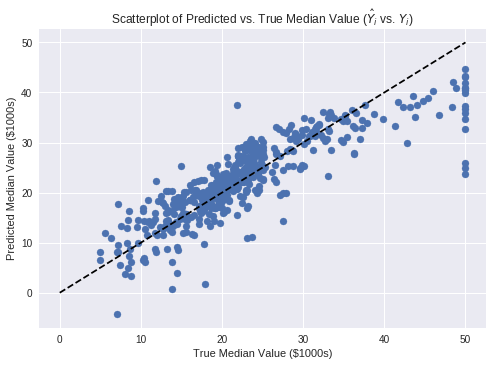

In [0]:
# scatterplot of true median value vs. predicted median value
plt.scatter(Y, y_predict)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True Median Value ($1000s)')
plt.ylabel('Predicted Median Value ($1000s)')
plt.title('Scatterplot of Predicted vs. True Median Value ($\hat{Y}_i$ vs. $Y_i$)')
plt.show()

**(b) Perform a 10 fold cross validation, analyze the significance of different variables with the statistics obtained from the model you have trained, and the averaged Root Mean Squared Error (RMSE), and plot 1) fitted values against true values as scatter plots using the whole dataset;  2) residuals versus fitted values as scatter plots using the whole dataset.**

In [0]:
lm = LinearRegression()
kf = KFold(n_splits=10, random_state=0)

rmse_ts = np.zeros(10)
rmse_tr = np.zeros(10)
min_rmse = float("inf")

def rmse(true, pred):
  rmse = np.sqrt(mean_squared_error(true, pred))
  return rmse

for fold, Index in enumerate(kf.split(X)):
  train_index, test_index = Index
  Xtr, Xts = X.loc[train_index], X.loc[test_index]
  Ytr, Yts = Y.loc[train_index], Y.loc[test_index]
  
  lm.fit(Xtr, Ytr)
  pred_tr = lm.predict(Xtr)
  pred_ts = lm.predict(Xts)
  
  rmse_tr[fold] = rmse(Ytr, pred_tr) 
  rmse_ts[fold] = rmse(Yts, pred_ts) 
  if rmse_ts[fold] < min_rmse:
    min_rmse = rmse_ts[fold]
    best_lm = lm

In [0]:
print('estimated coefficients: ')
print (str(best_lm.coef_))

estimated coefficients: 
[-1.05618627e-01  4.91381113e-02  3.21540897e-02  2.51293737e+00
 -1.76280019e+01  3.81765978e+00  1.05792271e-02 -1.43608998e+00
  3.61498721e-01 -1.54712068e-02 -9.12347239e-01  9.85932090e-03
 -5.55092176e-01]


In [0]:
pd.DataFrame(list(zip(X.columns, best_lm.coef_)), 
             columns = ['Features', 'estimatedCoefficients'])



,Features,estimatedCoefficients
0,CRIM,-0.105619
1,ZN,0.049138
2,INDUS,0.032154
3,CHAS,2.512937
4,NOX,-17.628002
5,RM,3.817660
6,AGE,0.010579
7,DIS,-1.436090
8,RAD,0.361499
9,TAX,-0.015471


In [0]:
print('Test RMSE', rmse_ts)
print('Train RMSE', rmse_tr)

Test RMSE [ 3.04744921  3.76181913  3.75148053  5.93354231  5.64669077  4.45374875
  3.15392917 12.9759539   5.77319193  3.3106511 ]
Train RMSE [4.83355236 4.78351694 4.81830623 4.55759835 4.61902872 4.72902737
 4.82982623 3.45820725 4.6461054  4.81550033]


In [0]:
# analyze the significance of different variables (look at p-values)

# using best model from kfold cv
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(Xtr)
est = sm.OLS(Ytr, X2)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     97.84
Date:                Thu, 07 Mar 2019   Prob (F-statistic):          4.84e-121
Time:                        06:35:46   Log-Likelihood:                -1363.8
No. Observations:                 456   AIC:                             2756.
Df Residuals:                     442   BIC:                             2813.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.5666      5.417      6.565      0.0

In [0]:
# another method using p-values of F-scores
best_lm_stats = f_regression(Xtr, Ytr)

print("F-Scores: ", best_lm_stats[0:1])
print("-----------------------------------------------------------------------")
print("p-values: ", best_lm_stats[1:])



F-Scores:  (array([ 84.65423256,  63.5345768 , 130.61790615,  13.0574624 ,
        96.0484957 , 427.86469585,  69.01178683,  25.31812658,
        85.94101896, 128.47866395, 151.89984009,  59.48342926,
       540.68464215]),)
-----------------------------------------------------------------------
p-values:  (array([1.30115371e-18, 1.28682764e-14, 9.26972369e-27, 3.35845986e-04,
       1.06756129e-20, 1.88213336e-67, 1.13889966e-15, 7.01730881e-07,
       7.52342452e-19, 2.14391810e-26, 2.61505953e-30, 7.87821489e-14,
       2.40900418e-79]),)


**Plotting fitted values against true values as scatterplots using the best model from k-fold cv **

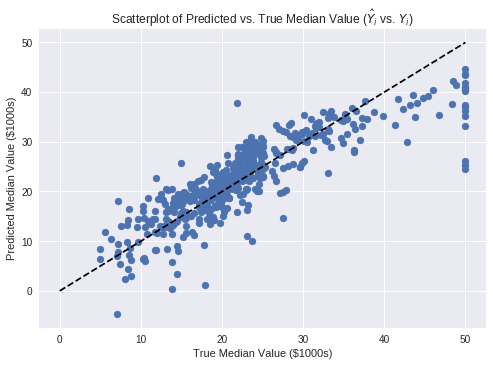

In [0]:
# scatterplot of true median value vs. predicted median value
y_pred = best_lm.predict(X)

plt.scatter(Y, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('True Median Value ($1000s)')
plt.ylabel('Predicted Median Value ($1000s)')
plt.title('Scatterplot of Predicted vs. True Median Value ($\hat{Y}_i$ vs. $Y_i$)')
plt.show()

**Plotting residuals versus fitted values as scatter plots:**

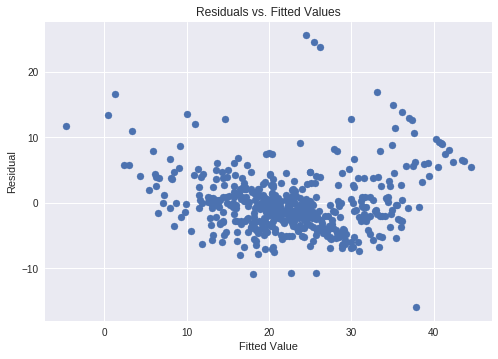

In [0]:
resid = Y - y_pred
plt.scatter(y_pred, resid)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Residuals vs. Fitted Values')
plt.show()

## 3. Control overfitting via regularization of the parameters

**(a) You are asked to try the following regularizations with suitable parameters.**  

**1.   Ridge Regularizer**  

**2.   Lasso Regularizer **  

**3.   Elastic Net Regularizer (optional)**  

**Optimize over choices of $\alpha, \lambda_1, \lambda_2$ to pick one good model, report the best RMSE obtained via 10-fold cross validation. Compare the values of the estimated coeffcients for these regularized good models, with the unregularized best model.**


1. Ridge Regularizer: min ∥Y − Xβ∥2 + α ∥β∥2 β
2. Lasso Regularizer: min ∥Y − Xβ∥2 + α ∥β∥1 β
3. Elastic Net Regularizer: min ∥Y − Xβ∥2 + λ1 ∥β∥1 + λ2 ∥β∥2 (optional) β


In [0]:
# selecting best alpha in ridge regression

# Load libraries
#from sklearn.linear_model import RidgeCV
#from sklearn.preprocessing import StandardScaler

#regr_cv = RidgeCV(alphas=[0.0001, 0.001, 0.01, .1, .5, 1, 5, 10], cv=10)

# Fit the linear regression
#model_cv = regr_cv.fit(X_std, Y)

#print('The optimal alpha is ', model_cv.alpha_)
#print('---------------------------------------')

In [0]:
from sklearn import linear_model

kf = KFold(n_splits=10, random_state=0)

def rmse(target, pred):
  rmse = np.sqrt(((pred - target) ** 2).mean())
  return rmse

nalpha = 100
alpha_test = np.logspace(-4, 3, nalpha)
rmse_tr = np.zeros((nalpha, 10))
rmse_ts = np.zeros((nalpha, 10))

def opt_regularizer(name):
    print('using ' + name)
    best_comb = None
    min_rmse = float("inf")
    opt_alpha = 1
    for it, alpha in enumerate(alpha_test):
        if name == 'Ridge Regularizer':
          reg = linear_model.Ridge(alpha = alpha)
        elif name == 'Lasso Regularizer':
          reg = linear_model.Lasso(alpha = alpha)
        elif name == 'ElasticNet':
          reg = linear_model.ElasticNet(alpha = alpha)

        for fold, Index in enumerate(kf.split(X)):
          train_index, test_index = Index
          Xtr, Xts = X.loc[train_index], X.loc[test_index]
          Ytr, Yts = Y.loc[train_index], Y.loc[test_index]

          reg.fit(Xtr, Ytr)
          pred_tr = reg.predict(Xtr)
          pred_ts = reg.predict(Xts)

          rmse_tr[it][fold] = rmse(Ytr, pred_tr) 
          rmse_ts[it][fold] = rmse(Yts, pred_ts) 
          if rmse_ts[it][fold] < min_rmse:
            min_rmse = rmse_ts[it][fold]
            opt_alpha = alpha

    print ('Optimal Alpha: ', opt_alpha)
    print ('Minimum Test Rmse: ', min_rmse)
    
    if name == 'Ridge Regularizer':
      alg = linear_model.Ridge(alpha = opt_alpha)
    elif name == 'Lasso Regularizer':
      alg = linear_model.Lasso(alpha = opt_alpha)
    elif name == 'ElasticNet':
      alg = linear_model.ElasticNet(alpha = opt_alpha)
    alg.fit(X, Y)
    print ('estimated coefficients: ')
    print (str(alg.coef_))
    print ('-----------------------------------------')



In [0]:
opt_regularizer('Lasso Regularizer')

using Lasso Regularizer
Optimal Alpha:  12.32846739442066
Minimum Test Rmse:  2.9328401479703987
estimated coefficients: 
[-0.          0.02689532 -0.          0.         -0.          0.
  0.         -0.          0.         -0.01055169 -0.          0.00802332
 -0.49851128]
-----------------------------------------


In [0]:
opt_regularizer('Ridge Regularizer')

using Ridge Regularizer
Optimal Alpha:  0.2477076355991709
Minimum Test Rmse:  3.0455305087426066
estimated coefficients: 
[-1.06792851e-01  4.67667289e-02  1.02015739e-02  2.64718615e+00
 -1.53076371e+01  3.82830734e+00 -1.48646580e-03 -1.43934161e+00
  3.00317156e-01 -1.25313023e-02 -9.25546153e-01  9.43969125e-03
 -5.27548902e-01]
-----------------------------------------


In [0]:
opt_regularizer('ElasticNet')

using ElasticNet
Optimal Alpha:  17.073526474706888
Optimal Test Rmse:  3.0374469307749328
estimated coefficients: 
[-0.          0.03534835 -0.          0.          0.          0.
  0.         -0.          0.         -0.01066137 -0.          0.00860596
 -0.47739953]
-----------------------------------------


In [0]:
#elastic net
from sklearn import linear_model

kf = KFold(n_splits=10, random_state=0)

def rmse(target, pred):
  rmse = np.sqrt(((pred - target) ** 2).mean())
  return rmse

nalpha = 100
alpha_test = np.logspace(-4, 3, nalpha)
l1ratio_test = np.arange(0, 1.01, 0.1)
rmse_tr = np.zeros((nalpha, 11, 10))
rmse_ts = np.zeros((nalpha, 11, 10))


min_rmse = float("inf")
opt_alpha = 1
opt_ratio = 0
for r, ratio in enumerate(l1ratio_test):
  for it, alpha in enumerate(alpha_test):
    reg = linear_model.ElasticNet(alpha = alpha, l1_ratio=ratio)
    for fold, Index in enumerate(kf.split(X)):
      train_index, test_index = Index
      Xtr, Xts = X.loc[train_index], X.loc[test_index]
      Ytr, Yts = Y.loc[train_index], Y.loc[test_index]

      reg.fit(Xtr, Ytr)
      pred_tr = reg.predict(Xtr)
      pred_ts = reg.predict(Xts)

      rmse_tr[it][r][fold] = rmse(Ytr, pred_tr) 
      rmse_ts[it][r][fold] = rmse(Yts, pred_ts) 
      if rmse_ts[it][r][fold] < min_rmse:
        min_rmse = rmse_ts[it][r][fold]
        opt_alpha = alpha
        opt_ratio = ratio



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

In [0]:
print('Optimal Alpha: ', opt_alpha)
print('Optimal L1 Ratio', opt_ratio)
print('Minimum Test Rmse: ', min_rmse)




Optimal Alpha:  10.47615752789664
Optimal L1 Ratio 0.0
Minimum Test Rmse:  2.798266966318117


In [0]:
alg = linear_model.ElasticNet(alpha = opt_alpha, l1_ratio=opt_ratio)
alg.fit(X, Y)
print ('estimated coefficients: ')
print (str(alg.coef_))
print ('-----------------------------------------')

estimated coefficients: 
[-0.07823032  0.05582952 -0.04440294  0.02606377 -0.00075359  0.16526262
  0.03433185 -0.19961024  0.19091566 -0.01419382 -0.2842187   0.00821149
 -0.63660781]
-----------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
